<center>
    <h1 style="font-family: verdana">World Happiness Report</h1>
</center>


<center>
    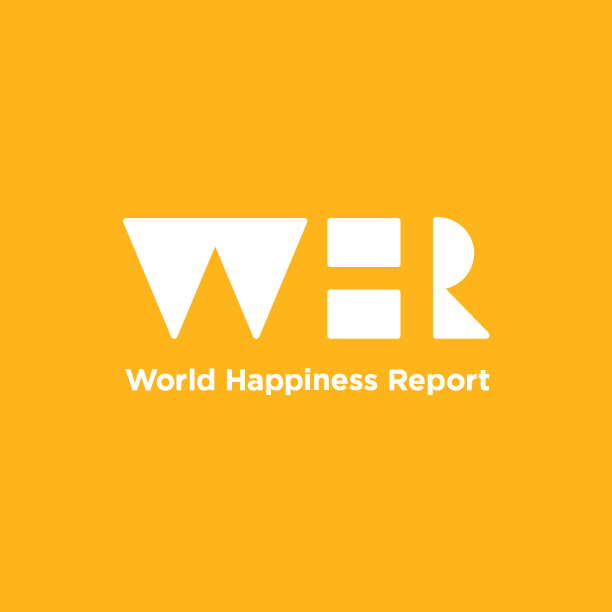
</center>

<center>
    <h1>About the notebook</h1>
    <p style="font-weight:bold;
              font-size:1.1em">
        This is a visualization notebook for the World Happiness Index using visualization library of Plotly. It contains various comparison among countries' happiness and also its corelation with other factors.
    </p>
</center>

# To Do

- Grouby subregion table
- comparison with best and wort country ✔
- India comparison
- India over time
- Plots for other features with ladder score

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns

pio.templates.default = "plotly_white"

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df_2021 = pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv")
df = pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report.csv")

In [ ]:
df_2021

<div class="alert alert-info" style="font-size:1.2em">
    <strong style="margin-bottom:20px">📌 Ladder Score</strong>
    <p>
        This is called the Cantril ladder: it asks respondents to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. It is basically a parameter for the Happiness Index for a country. The following figure gives the Ladder Score for countries on the world map.
    </p>
</div>

In [ ]:
fig = go.Figure()

fig.add_trace(go.Choropleth(locations=df_2021['Country name'],
                            z=df_2021['Ladder score'],
                            locationmode="country names",
                            colorscale="PuBuGn",
#                             reversescale=True,
                            colorbar_title="Ladder Score"
                           ))

fig.update_layout(title={
                  'text': "2021 Global Ladder Score",
                  'y':0.9,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                  width=1000, height=600,
                  geo_showframe=False,
                 )

fig.show()

In [ ]:
data = [df_2021['Ladder score'], df[df['year'] == 2020]['Life Ladder'], df[df['year'] == 2016]['Life Ladder'], df[df['year'] == 2012]['Life Ladder']]
labels = ['2021', '2020', '2016', '2012']

fig = ff.create_distplot(data, labels, show_rug=False, show_hist=False)

fig.update_layout(title="Distribution of Ladder Score")

fig.show()

In [ ]:
df_2021[df_2021['Ladder score'] == np.min(df_2021['Ladder score'])]['Country name']

In [ ]:
df_2021[df_2021['Ladder score'] == np.max(df_2021['Ladder score'])]['Country name']

In [ ]:
df_2021.head()

In [ ]:
fig = make_subplots(rows=1, cols=2,
                    column_widths=[0.5, 0.5],
                    subplot_titles=['Best 10 Countries', 'Worst 10 Countries'],
                    horizontal_spacing=0.001
                   )

fig.add_trace(go.Bar(x=df_2021.sort_values('Ladder score', ascending=False)[:10]['Ladder score'], 
                     y=df_2021.sort_values('Ladder score', ascending=False)[:10]['Country name'],
                     orientation='h',
                     marker=dict(
                         color='rgba(0, 204, 150, 0.6)',
                         line=dict(color='rgba(0, 204, 150, 1)', width=2)
                     ),
                     name=''
                    ),1,1)

fig.add_trace(go.Bar(x=df_2021.sort_values('Ladder score', ascending=True)[:10]['Ladder score'],
                     y=df_2021.sort_values('Ladder score', ascending=True)[:10]['Country name'],
                     orientation='h',
                     marker=dict(
                         color='rgba(239, 85, 59, 0.6)',
                         line=dict(color='rgba(239, 85, 59, 1)', width=2)
                     ),
                     name=''
                    ),1,2)

fig.update_layout(
                  yaxis1_autorange='reversed',
                  yaxis2_autorange='reversed',
#                   xaxis2_autorange='reversed',
                  yaxis2_side='right',
                  showlegend=False,
                  template='plotly_white',
                  title={
                  'text': "2021 Countries Ladder Score",
                  'y':0.9,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top',
                  'font_size': 20},
                  xaxis2=dict(
                      range=[7,0],
                      showline=True,
                      mirror=True,
                      linewidth=2,
                      linecolor='slategrey'
                  ),
                  xaxis1=dict(
                      showline=True,
                      mirror=True,
                      linewidth=2,
                      linecolor='slategrey'
                  ),
                  yaxis1=dict(
                      showline=True,
#                       mirror=True,
                      linewidth=2,
                      linecolor='slategrey'
                  ),
                  yaxis2=dict(
                      showline=True,
#                       mirror=True,
                      linewidth=2,
                      linecolor='slategrey'
                  )
                 )

fig.show()

In [ ]:
df_2021.sort_values('Ladder score', ascending=False)

<div class='alert alert-info'>
    <strong></strong>
    <p>Country with the lowest ladder score is Afghanistan an dthe country with the highest score is Finland as of 2021.This may depend on factors in the countries such as GDP per capita, generosity, life exp, freedom to make choices, etc.</p>
</div>

In [ ]:
best_worst = df_2021[df_2021['Country name'].isin(['Finland', 'Afghanistan'])]
best_worst['Healthy life expectancy'] = best_worst['Healthy life expectancy'].apply(lambda x: x/10)
best_worst

In [ ]:
fig = px.bar(best_worst.iloc[:,6:12], barmode='group')

fig.update_traces(marker=dict(line=dict(width=1,
                                        color='DarkSlateGrey')
                             ))

fig.update_layout(title={
                  'text': "2021 Countries Ladder Score",
                  'y':0.95,
                  'x':0.45,
                  'xanchor': 'center',
                  'yanchor': 'top',
                  'font_size': 20},
                  xaxis=dict(
                      tickmode='array',
                      tickvals=[0, 148],
                      ticktext=['Finland', 'Afghanistan'],
#                       visible=False,
#                       showticklabels=True
                      title=""
                  ),
                  yaxis_title="",
                  legend_title=""
                 )

fig.show()

In [ ]:
fig = px.scatter(df_2021, x=df_2021['Healthy life expectancy'], y=df_2021['Logged GDP per capita'],
                 color='Regional indicator', size='Ladder score', hover_name='Country name'
                )

fig.update_layout(legend_title="",
                  title={
                  'text': "2021 Countries Ladder Score",
                  'y':0.95,
                  'x':0.4,
                  'xanchor': 'center',
                  'yanchor': 'top',
                  'font_size': 20}
                 )

fig.show()

In [ ]:
df_india = df[df['Country name'] == 'India']
df_india['Healthy life expectancy at birth'] = df_india['Healthy life expectancy at birth'].apply(lambda x: x/10)
df_india['Freedom to make life choices'] = df_india['Freedom to make life choices'].apply(lambda x: x*10)
# df_india.loc[732,'Log GDP per capita']
# df_india[1:]

In [ ]:
fig = go.Figure()

texts = ['Happiness Index', "GDP per Capita", "Life Expectancy(x10)", "Freedom to make<br> Life Choices", "Corruption"]
columns = ['Life Ladder', 'Log GDP per capita', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Perceptions of corruption']

annotations = []

for col, text in zip(columns, texts):
    annotations.append(dict(xref='paper', x=0.05, y=df_india.loc[733, col],
                                  xanchor='right', yanchor='middle',
                                  text='<span style="color:rgba(51,51,51,0.7)">{}</span> <b>{}</b>'.format(text, df_india.loc[733, col]),
                                  font=dict(family='Arial',
                                            size=16,
#                                             color='rgba(51,51,51,0.5)'
                                           ),
                                  showarrow=False))

fig.add_trace(go.Scatter(x=df_india[1:]['year'], y=df_india[1:]['Life Ladder'], 
                         name='Ladder Score',
                         line=dict(width=5),
                         marker=dict(size=10)
                        ))

fig.add_trace(go.Scatter(x=df_india[1:]['year'], y=df_india[1:]['Log GDP per capita'], name='GDP per Capita'))

fig.add_trace(go.Scatter(x=df_india[1:]['year'], y=df_india[1:]['Healthy life expectancy at birth'], 
                         name='Life Expectancy(x10)'))

fig.add_trace(go.Scatter(x=df_india[1:]['year'], y=df_india[1:]['Freedom to make life choices'], 
                         name='Freedom to make Life Choices(%10)'))

fig.add_trace(go.Scatter(x=df_india[1:]['year'], y=df_india[1:]['Perceptions of corruption'], name='Corruption'))

fig.update_traces(mode='lines+markers')

fig.update_layout(title={
                  'text': "India Happiness Index",
                  'y':0.95,
                  'x':0.4,
                  'xanchor': 'center',
                  'yanchor': 'top',
                  'font_size': 22},
                  xaxis=dict(
                      showline=True,
                      linecolor='slategrey',
                      linewidth=2,
                      showticklabels=True,
                      showgrid=False
                  ),
                  yaxis_visible=False,
                  margin=dict(
                      autoexpand=False,
                      l=200,
                      r=20,
                      t=110,
                  ),
                  showlegend=False,
                  annotations=annotations
                 )



fig.show()